### AutoRegressive Model states that `present value depends on past values`

### `it is a regression against itself`

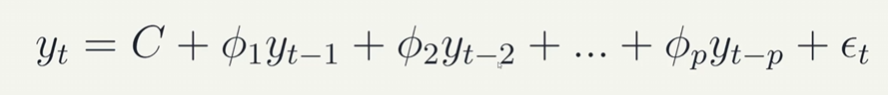

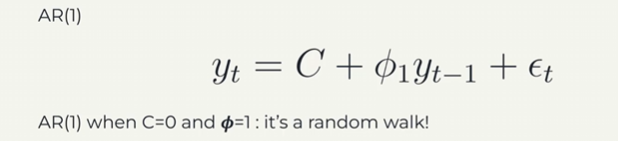

### `random walk is the special case of AR(1) Model`

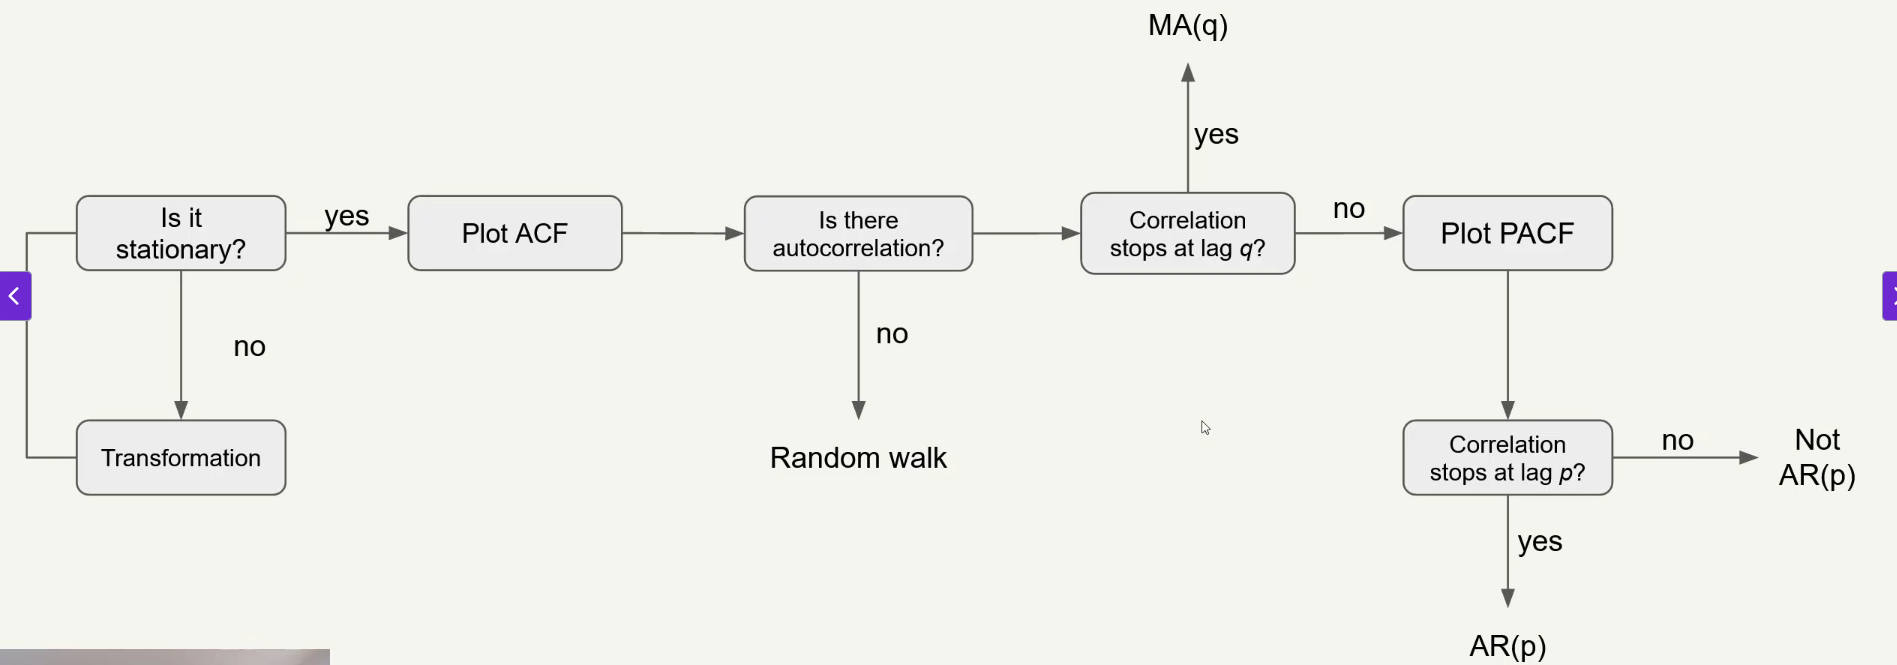

### If ACF Plot is slowly `decaying or sinusoidal`, then you know that we've to plot the PACF Plot.


### PACF measures the correlation between lagged values in a time series when we remove the influence of correlated lagged values `in between`

### PACF isolates the effect of each lag by removing the influence of correlated lagged values in between.

### The PACF plot can identify the `order of AR Process`.

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
plt.rcParams["figure.figsize"] = (9,6)

In [3]:
np.random.seed(1)

ma2 = np.array([1,0,0])
ar2 = np.array([1,-0.33,-0.56])
ar2_process = ArmaProcess(ar2,ma2).generate_sample(1000)
ar2_process

array([ 1.62434536e+00, -7.57224436e-02,  3.56473245e-01, -9.97737020e-01,
        7.35779430e-01, -2.61746422e+00,  1.29308505e+00, -1.80026879e+00,
        4.49078024e-01, -1.10932515e+00,  1.34751433e+00, -2.23668307e+00,
       -3.05914591e-01, -1.73754869e+00,  3.89066205e-01, -1.94452668e+00,
       -5.96244939e-01, -2.16355419e+00, -1.00565630e+00, -9.60641713e-01,
       -1.98079847e+00, -4.68991448e-02, -2.23133141e-01,  4.02596881e-01,
        9.08758361e-01, -1.58383347e-01,  3.33747952e-01, -9.14327284e-01,
       -3.82717230e-01, -1.07964498e-01, -9.41610685e-01, -7.67945172e-01,
       -1.46789659e+00, -1.75966081e+00, -2.07395629e+00, -1.68248023e+00,
       -2.83394435e+00, -1.64297487e+00, -4.69388362e-01, -3.32919924e-01,
       -5.64556610e-01, -1.26036780e+00, -1.47923137e+00,  4.98502279e-01,
       -6.13056060e-01, -5.60142870e-01, -3.37243056e-01,  1.67528492e+00,
        4.84146865e-01,  1.71513113e+00,  1.13728584e+00,  9.83527913e-01,
       -1.81073918e-01,  

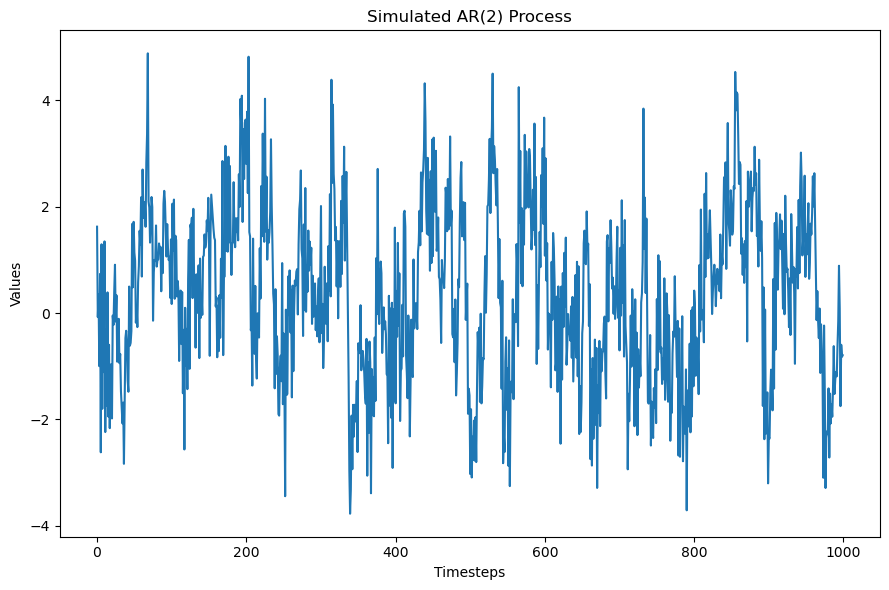

In [4]:
fig, ax = plt.subplots()

ax.plot(ar2_process)
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
ax.set_title("Simulated AR(2) Process")
plt.tight_layout()

In [6]:
# Stationarity Check

ADF_result = adfuller(ar2_process)

print(f"ADF Test statistic : {ADF_result[0]}")
print(f"P-value : {ADF_result[1]}")

ADF Test statistic : -6.732979897336915
P-value : 3.2604128940252546e-09


### Since p-value < 0.05, we conclude that the given time series is stationary in nature.

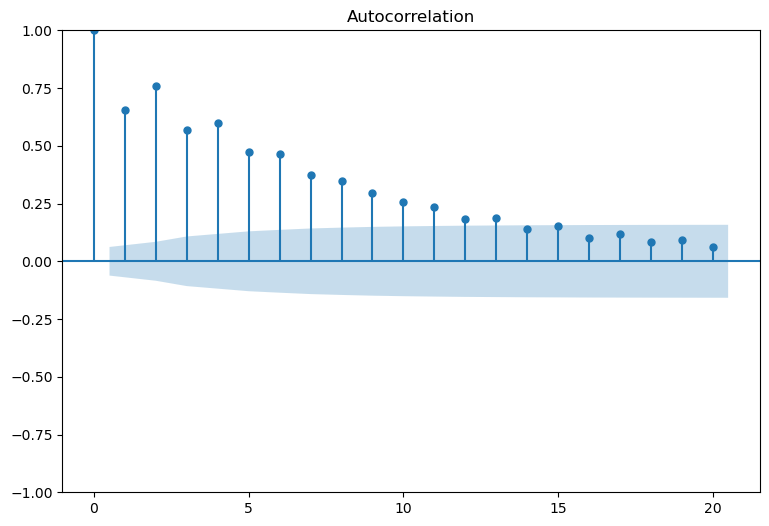

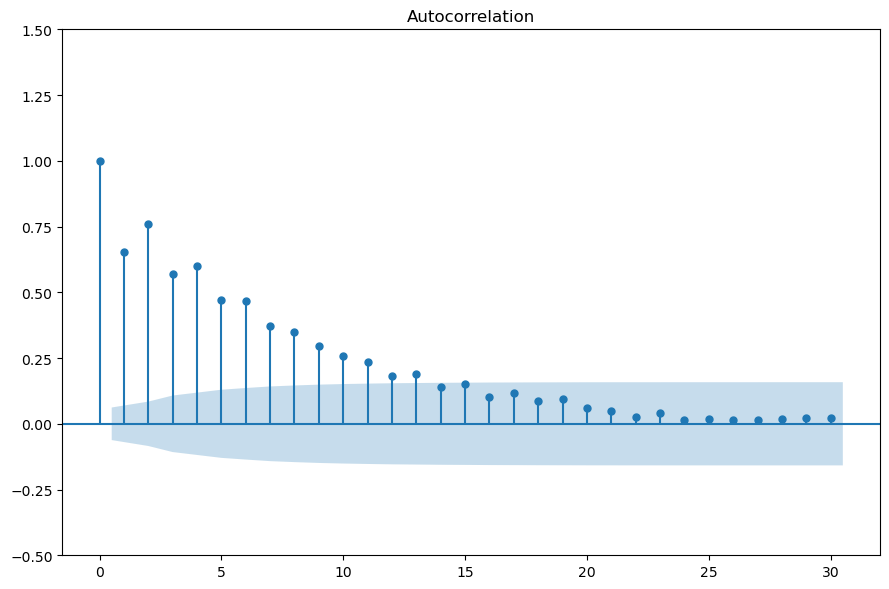

In [9]:
plot_acf(ar2_process, lags=20)
plot_acf(ar2_process, lags=30)

plt.ylim(-0.5, 1.5)
plt.tight_layout()

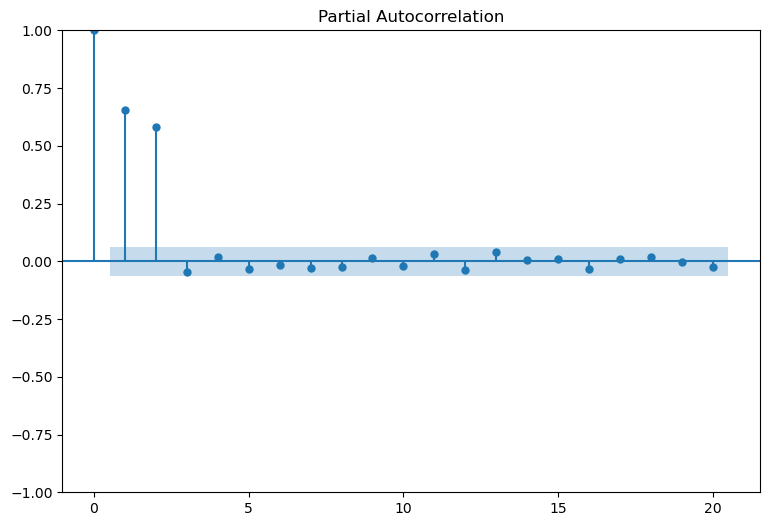

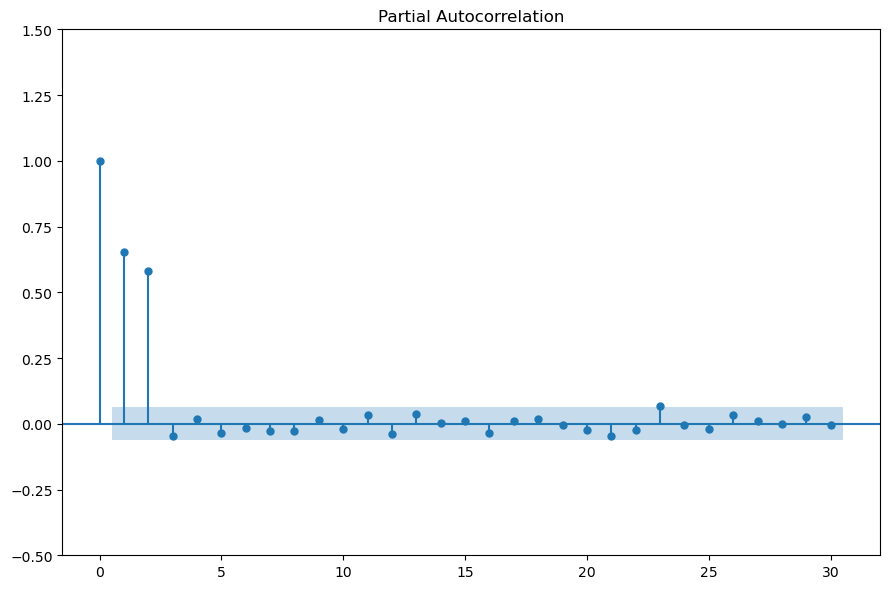

In [10]:
plot_pacf(ar2_process, lags=20)
plot_pacf(ar2_process, lags=30)

plt.ylim(-0.5,1.5)
plt.tight_layout()

### We conclude that it is the AR(2) Process since the correlation stops at p = 2

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesForecastingInPython/refs/heads/master/data/simulated_AR2.csv")
data.head()

,value
0,100.000000
1,100.496714
2,100.507464
3,101.456406
4,103.270569


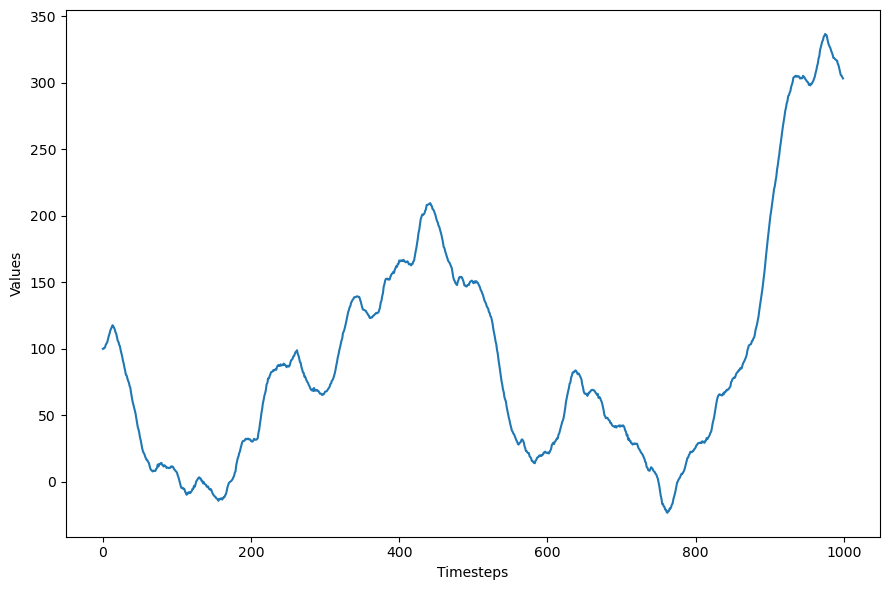

In [12]:
fig, ax = plt.subplots()

ax.plot(data["value"])
ax.set_xlabel("Timesteps")
ax.set_ylabel("Values")
plt.tight_layout()

In [16]:
ADF_result = adfuller(data["value"])

print(f"ADF Test statistic : {ADF_result[0]}")
print(f"P-value : {ADF_result[1]}")

ADF Test statistic : -1.1218683768898041
P-value : 0.7062727342770825


### First order differencing lead to stationary data

In [19]:
ADF_result = adfuller(np.diff(data.value, n=1))

print(f"ADF Test statistic : {ADF_result[0]}")
print(f"P-value : {ADF_result[1]}")

ADF Test statistic : -5.565515624443827
P-value : 1.5079043416320668e-06
